In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML
from tqdm import tqdm_notebook as tqdm

from neupy import utils
from neupy.algorithms import GrowingNeuralGas as GNG

utils.reproducible()

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('data/iris.data', header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


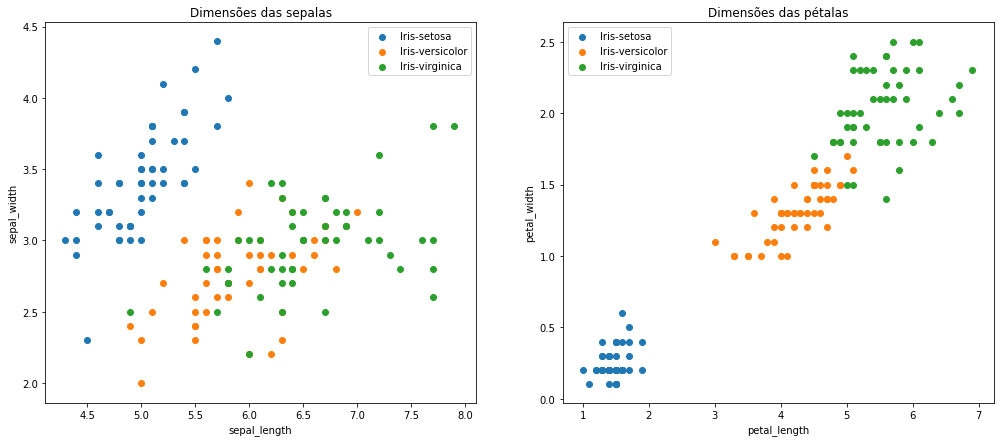

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(17, 7))
ax[0].set_title('Dimensões das sepalas')
ax[0].scatter(df[df["class"] == 'Iris-setosa']['sepal_length'].values,
            df[df["class"] == 'Iris-setosa']['sepal_width'].values, label='Iris-setosa')
ax[0].scatter(df[df["class"] == 'Iris-versicolor']['sepal_length'].values,
            df[df["class"] == 'Iris-versicolor']['sepal_width'].values, label='Iris-versicolor')
ax[0].scatter(df[df["class"] == 'Iris-virginica']['sepal_length'].values,
            df[df["class"] == 'Iris-virginica']['sepal_width'].values, label='Iris-virginica')
ax[0].set_xlabel('sepal_length')
ax[0].set_ylabel('sepal_width')
ax[0].legend()

ax[1].set_title('Dimensões das pétalas')
ax[1].scatter(df[df["class"] == 'Iris-setosa']['petal_length'].values,
            df[df["class"] == 'Iris-setosa']['petal_width'].values, label='Iris-setosa')
ax[1].scatter(df[df["class"] == 'Iris-versicolor']['petal_length'].values,
            df[df["class"] == 'Iris-versicolor']['petal_width'].values, label='Iris-versicolor')
ax[1].scatter(df[df["class"] == 'Iris-virginica']['petal_length'].values,
            df[df["class"] == 'Iris-virginica']['petal_width'].values, label='Iris-virginica')
ax[1].set_xlabel('petal_length')
ax[1].set_ylabel('petal_width')
ax[1].legend()



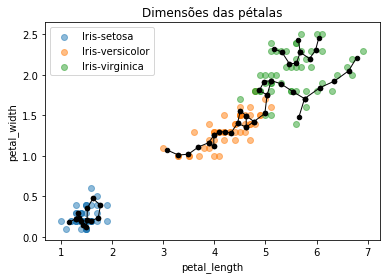

In [77]:
nodes, max_age, max_nodes = 2, 25, 50

plt.title('Dimensões das pétalas')
plt.scatter(df[df["class"] == 'Iris-setosa']['petal_length'].values,
            df[df["class"] == 'Iris-setosa']['petal_width'].values, label='Iris-setosa', alpha=.5)
plt.scatter(df[df["class"] == 'Iris-versicolor']['petal_length'].values,
            df[df["class"] == 'Iris-versicolor']['petal_width'].values, label='Iris-versicolor', alpha=.5)
plt.scatter(df[df["class"] == 'Iris-virginica']['petal_length'].values,
            df[df["class"] == 'Iris-virginica']['petal_width'].values, label='Iris-virginica', alpha=.5)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

data = df[['petal_length', 'petal_width']].values
gng = GNG(n_inputs=nodes, max_edge_age=max_age, max_nodes=max_nodes)


gng.train(data, epochs=500)

for node_1, node_2 in gng.graph.edges:
#     print(node_2.weight)
    weights = np.concatenate([node_1.weight, node_2.weight])
    plt.plot(*weights.T, color='k', linewidth=1)
    plt.scatter(*weights.T, color='k', s=20)